In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits() 
x=digits.data
y=digits.target

In [3]:
x=pd.DataFrame(x)
y=pd.DataFrame(y,columns=['target'])

In [4]:
x=x.sub(x.mean(axis=0), axis=1)
x=x.values

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, y], axis = 1)

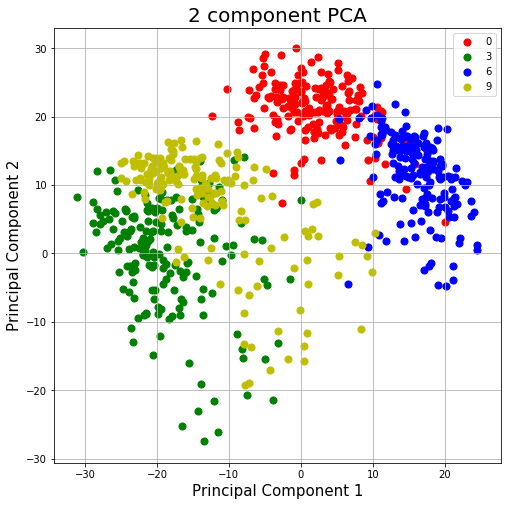

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,3,6,9]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
